# Librerías de Data Science más importantes en Python

- TensorFlow: es una librería open-source para el desarrollo y entrenamiento de modelos de aprendizaje profundo.

- Keras: es una librería de alto nivel para el desarrollo de modelos de aprendizaje profundo, construida sobre TensorFlow.

- **PyTorch**: es una librería open-source para el desarrollo y entrenamiento de modelos de aprendizaje profundo con un enfoque en la flexibilidad y la velocidad.

- Scikit-Learn: es una librería para el aprendizaje automático de alto nivel, con una amplia variedad de algoritmos, incluyendo regresión, clasificación y agrupamiento.

- Pandas: es una librería para el análisis de datos que proporciona estructuras de datos flexibles y herramientas para manipular y analizar datos en formato tabular.

- Numpy: es una librería para el cálculo numérico en Python que proporciona una amplia variedad de funciones y herramientas para el trabajo con arrays multidimensionales.

- Matplotlib: es una librería para la creación de gráficos y visualizaciones en Python.

- Seaborn: es una librería de visualización de datos basada en Matplotlib que proporciona una amplia variedad de gráficos y visualizaciones de alto nivel.

- Plotly: es una librería de visualización de datos interactiva que proporciona una amplia variedad de gráficos y visualizaciones en 3D.

- Statsmodels: es una librería para la estadística y el modelado de datos en Python que proporciona una amplia variedad de modelos estadísticos, incluyendo regresión, análisis de series de tiempo y modelos de probabilidad generalizados.

***

### Entrenar una red neuronal simple en PyTorch:

PyTorch es una librería de código abierto que se enfoca en la flexibilidad y la facilidad de uso. Es ampliamente utilizado en investigación y desarrollo, ya que permite a los investigadores y desarrolladores crear y probar rápidamente nuevos modelos de aprendizaje automático. PyTorch se usa más en investigación y desarrollo, mientras que Tensorflow/Keras es una buena opción para la producción.

![](kerasVSpyTorch.png)

PyTorch es más trending:

![](pyTorch-Trends.png)

In [2]:
# pip install torch
# conda install PyTorch -c PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Ejemplo de datos de entrada y salida
# Sumar 1 al input, es el comportamiento que debe aprender la red neuronal
inputs = torch.randn(10)
targets = inputs + 1

print(inputs)
print(targets)

tensor([ 0.4971, -2.1370, -1.6785,  0.4668,  0.2657,  0.5974, -0.2350, -0.9463,
        -0.7191, -0.1787])
tensor([ 1.4971, -1.1370, -0.6785,  1.4668,  1.2657,  1.5974,  0.7650,  0.0537,
         0.2809,  0.8213])


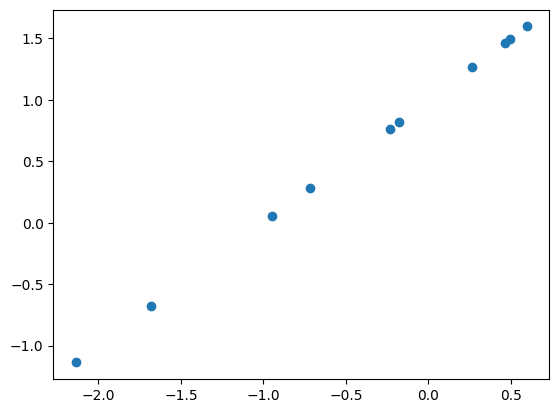

In [3]:
import matplotlib.pyplot as plt

plt.scatter(inputs, targets)

Veamos cómo entrenar una red neuronal simple con una sola capa fully connected (fc) con una entrada de 10 elementos y una salida de 10 elementos. Se utiliza una función de pérdida de error cuadrático medio (MSE) y el optimizador de gradiente descendente estocástico (SGD) para ajustar los pesos de la red. A medida que se entrena la red, se imprime la pérdida cada 100 iteraciones.

In [4]:
# Define la arquitectura de la red
# La clase SimpleNet hereda de la clase nn.Module
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Llamada al método __init__ del padre o clase base de la clase actual.
                            # está llamando al método __init__ de la clase nn.Module.
        self.fc = nn.Linear(10, 10) #  Crea una capa de red neuronal lineal, también conocida como una capa fully connected (fc)
                            # y la asigna como un atributo de la clase SimpleNet con el nombre fc.
                            # nn.Linear es una clase de PyTorch que define una capa de red neuronal lineal con una entrada y una salida.
                            # nn.Linear(10, 10) crea una capa con 10 entradas y 10 salidas. 

    def forward(self, x):   # método de la clase SimpleNet que define cómo las entradas son transformadas en las salidas
                            # a través de las capas de la red neuronal. Es un método requerido para todas las subclases
                            # de nn.Module en PyTorch.
                            # x representa la entrada a la red neuronal, y el método debe devolver la salida correspondiente.
                            # forward toma una entrada x y la pasa a través de la capa fully connected self.fc mediante
                            # la línea x = self.fc(x). La salida de esta capa es entonces devuelta como la salida de la red neuronal.
        x = self.fc(x)
        return x

# Instancie la red
model = SimpleNet()

# Defina la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrene el modelo
for i in range(1000):
    # Cada iteración (epoch) cambian los datos de entrada, permaneciendo igual la regla que genera los targets para tales inputs
    inputs = torch.randn(10)
    targets = inputs + 1

    # Ajuste el modelo a los datos de entrada y salida deseados
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f'Iteración {i}, pérdida: {loss.item()}')

Iteración 0, pérdida: 1.7304842472076416
Iteración 100, pérdida: 1.4503415822982788
Iteración 200, pérdida: 0.6685726642608643
Iteración 300, pérdida: 0.3938804566860199
Iteración 400, pérdida: 0.35644403100013733
Iteración 500, pérdida: 0.18423452973365784
Iteración 600, pérdida: 0.3576679229736328
Iteración 700, pérdida: 0.0375949889421463
Iteración 800, pérdida: 0.0823298841714859
Iteración 900, pérdida: 0.03840599209070206


In [5]:
targets

tensor([ 1.9334,  1.9481, -1.1223,  2.4449, -1.4472,  1.6971,  1.0887,  0.7209,
         0.2272,  1.7744])

### Entrenamiento/Aprendizaje

Inicialmente, a los pesos de la red se les asignan valores aleatorios, por lo que la red simplemente implementa una serie de transformaciones aleatorias. Naturalmente, su resultado está lejos de lo que debería ser idealmente y, en consecuencia, la puntuación de pérdida es muy alta.

Pero con cada ejemplo que procesa la red, los pesos se ajustan un poco en la dirección correcta y la puntuación de pérdida disminuye. Este es el bucle de entrenamiento que, repetido un número suficiente de veces (normalmente decenas de iteraciones en miles de ejemplos), produce valores de peso que minimizan la función de pérdida.

Una red con una pérdida mínima es aquella en la que los resultados están lo más cerca posible de los objetivos: una red entrenada. Una vez más, es un mecanismo simple que, una vez escalado, termina pareciendo magia.

### print(model)

**print(model)** es una instrucción que imprime información sobre el objeto de la clase SimpleNet llamado model. En PyTorch, las clases que heredan de nn.Module tienen un método __repr__ sobreescrito que permite imprimir información legible para el usuario sobre la arquitectura de la red neuronal.

Al imprimir el objeto model, se muestra la información de las capas de la red neuronal y su configuración. Por ejemplo, se puede ver el número de entradas y salidas de cada capa, y los valores de los parámetros de cada capa. Esto es útil para verificar si la arquitectura de la red neuronal es la que se esperaba, y para verificar si los parámetros de la red neuronal se establecen correctamente.

In [55]:
print(model)

SimpleNet(
  (fc): Linear(in_features=10, out_features=10, bias=True)
)


La salida "bias=True" indica que la capa nn.Linear tiene un parámetro bias (o sesgo) habilitado.

Un bias es un término adicional en la función de activación de una neurona que permite desplazar el resultado de la función de activación. Es decir, se añade un término adicional a la combinación lineal de los pesos y las entradas. El valor del bias se aprende durante el entrenamiento junto con los pesos.

La habilitación del bias en una capa permite a la red neuronal tener un mayor margen de maniobra para ajustar los resultados de la combinación lineal de los pesos y las entradas, permitiendo un mejor ajuste de los datos de entrenamiento. En general se recomienda habilitar el bias para mejorar el rendimiento de la red neuronal.

![](neuralNetworkBias.png)

Veamos cómo realiza predicciones la red neuronal entrenada. Le pasamos datos de input de una serie de test:

In [56]:
inputTest = torch.randn(10)
print("inputTest:", inputTest)

outputTest = model(inputTest)
print("outputTest:", outputTest)

inputTest: tensor([-0.5665, -0.9147, -1.1312, -0.1669, -2.4367, -1.2070, -2.5512,  0.8755,
         0.1719,  0.1094])
outputTest: tensor([ 0.5430, -0.1522, -0.1173,  0.7955, -1.0043, -0.0958, -1.4238,  1.4263,
         1.1179,  1.0814], grad_fn=<AddBackward0>)


In [57]:
import pandas as pd

# Pongo inputs y outputs de test en columnas de un dataframe
# tensor.detach().numpy() me convierte el tensor en array. Necesario hacerlo en el output, porque lleva agregado grad_fn=<AddBackward0>
dfTest = pd.DataFrame({"inputTest": inputTest, "outputTest": outputTest.detach().numpy()})
dfTest

,inputTest,outputTest
0,-0.566537,0.542997
1,-0.914653,-0.152248
2,-1.131208,-0.117340
3,-0.166930,0.795458
4,-2.436718,-1.004336
5,-1.206951,-0.095785
6,-2.551218,-1.423775
7,0.875538,1.426278
8,0.171920,1.117885
9,0.109373,1.081351


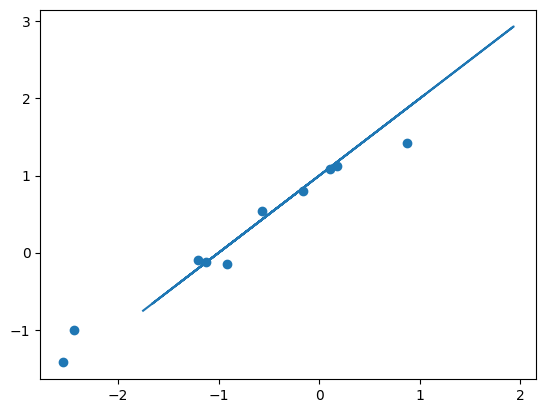

In [58]:
plt.plot(inputs, targets)
plt.scatter(dfTest["inputTest"], dfTest["outputTest"])

***

### Biología

Las redes neuronales son sistemas computacionales inspirados en el cerebro humano que se utilizan para resolver problemas complejos. Un axón es una prolongación de una célula nerviosa (neurona) que permite la transmisión de información a otras células nerviosas. Una sinapsis es el punto de conexión entre el axón de una neurona y el dendrita de otra neurona, donde se produce la transmisión de información entre las células nerviosas.

![](neuronaBiologica.jpg)

### Activación

La función sigmoide es una función de activación comúnmente utilizada en redes neuronales artificiales. Es una función logística que toma un valor de entrada y produce una salida en el rango de 0 a 1, lo que la hace adecuada para la clasificación binaria. La forma de la función sigmoide es S(x) = 1 / (1 + e^-x), donde e es el número de Euler y x es el valor de entrada.

![](funcionesMatematicas.jpg)

***

### Regresión exponencial

Generamos un ejemplo con un dataset de tendencia exponencial:

```y = a * 10^(b * x)```

donde a es la amplitud de la curva y b es la tasa de crecimiento, x representa el número de períodos e y es el valor en ese período.

Generamos un dataset de 10 períodos con una amplitud de a = 2 y una tasa de crecimiento de b = 0.5 en Python:

In [93]:
import numpy as np
import pandas as pd

# definir los valores de a y b
a = 2
b = 0.5

# generar los valores de x
x = np.linspace(0, 10, 10001)

# calcular los valores de y
y = a * 10 ** (b * x)

# crear un dataframe con los valores de x e y
df = pd.DataFrame({'x': x, 'y': y})

df

,x,y
0,0.000,2.000000
1,0.001,2.002304
2,0.002,2.004610
3,0.003,2.006920
4,0.004,2.009232
...,...,...
9996,9.996,199081.083470
9997,9.997,199310.416027
9998,9.998,199540.012765
9999,9.999,199769.873987


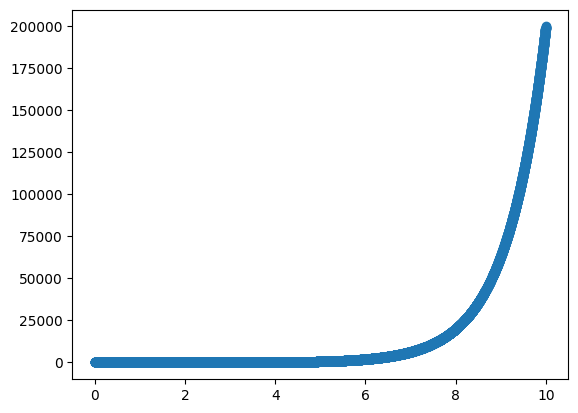

In [94]:
import matplotlib.pyplot as plt

plt.scatter(df["x"], df["y"])

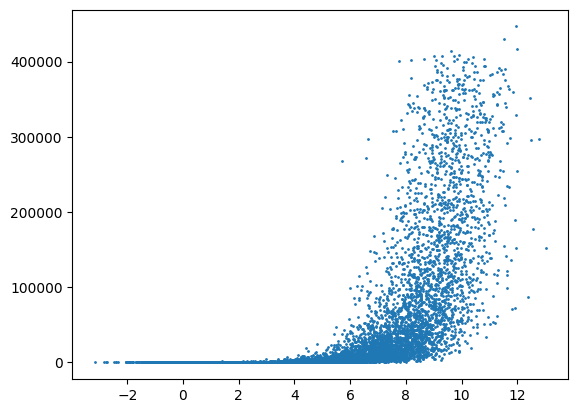

In [95]:
# Añado ruido en x e y
mu = 0
sigma = 1
df["x"] += np.random.normal(mu, sigma, len(df))
df["y"] += df["y"] * np.random.normal(mu + 1, sigma/10, len(df))

# ordeno por las x's
# df = df.sort_values("x")

plt.scatter(df["x"], df["y"], s = 1)

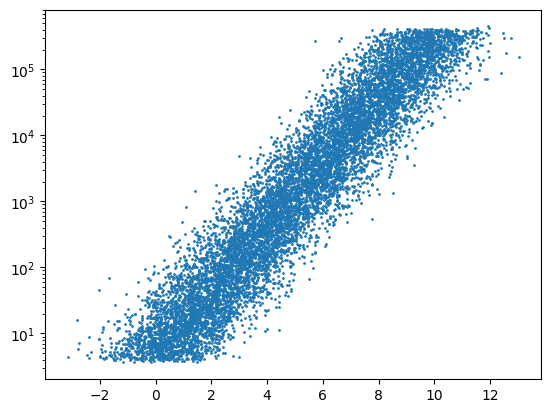

In [96]:
fig, ax = plt.subplots()
ax.scatter(df["x"], df["y"], s = 1)
ax.set_yscale("log")
plt.show()

In [97]:
# Normalización

df["logY"] = df["y"].apply(lambda x: np.log10(x))
df

,x,y,logY
0,-1.477412,3.959976,0.597693
1,-0.162348,3.639894,0.561089
2,-0.215684,4.136080,0.616589
3,1.143289,4.166161,0.619736
4,-0.786166,3.756258,0.574755
...,...,...,...
9996,10.172238,399978.763515,5.602037
9997,9.736585,406865.745493,5.609451
9998,11.691910,363786.690999,5.560847
9999,9.829345,403448.180771,5.605788


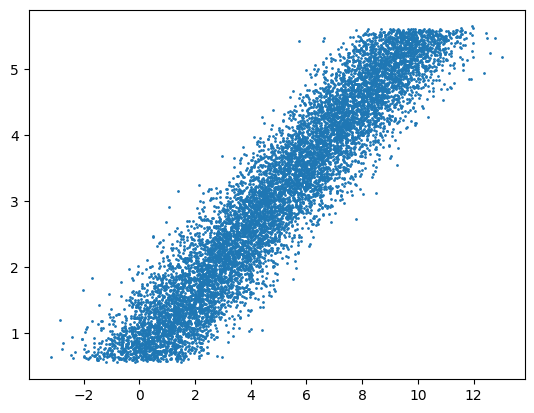

In [98]:
# Gráfica del dato normalizado, resulta lineal
plt.scatter(df["x"], df["logY"], s = 1)

***

### Regresión lineal del dato normalizado usando una red neuronal de pyTorch

In [99]:
# Vamos a hacer un split entre train y test
from sklearn.model_selection import train_test_split

dfTrain, dfTest = train_test_split(df, test_size=0.1, shuffle=False)

In [100]:
# pip install torch
# conda install PyTorch -c PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Define la arquitectura de la red
# La clase SimpleNet hereda de la clase nn.Module
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()  # Llamada al método __init__ del padre o clase base de la clase actual.
                            # está llamando al método __init__ de la clase nn.Module.
        self.fc = nn.Linear(10, 10) #  Crea una capa de red neuronal lineal, también conocida como una capa fully connected (fc)
                            # y la asigna como un atributo de la clase SimpleNet con el nombre fc.
                            # nn.Linear es una clase de PyTorch que define una capa de red neuronal lineal con una entrada y una salida.
                            # nn.Linear(10, 10) crea una capa con 10 entradas y 10 salidas. 

    def forward(self, x):   # método de la clase SimpleNet que define cómo las entradas son transformadas en las salidas
                            # a través de las capas de la red neuronal. Es un método requerido para todas las subclases
                            # de nn.Module en PyTorch.
                            # x representa la entrada a la red neuronal, y el método debe devolver la salida correspondiente.
                            # forward toma una entrada x y la pasa a través de la capa fully connected self.fc mediante
                            # la línea x = self.fc(x). La salida de esta capa es entonces devuelta como la salida de la red neuronal.
        x = self.fc(x)
        return x

# Instancie la red
model = SimpleNet()

# Defina la función de pérdida y el optimizador
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Entrene el modelo
numEpochs = len(dfTrain)//10 # cada epoch admite 10 datos de input
for i in range(numEpochs):
    # Cada iteración (epoch) cambian los datos de entrada, recorriendo el dataset de training
    inputs = dfTrain.loc[i*10:i*10+9]["x"]
    targets = dfTrain.loc[i*10:i*10+9]["logY"] # a la red neuronal se le alimenta con el dato normalizado

    # Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
    inputs = torch.tensor(inputs.to_numpy().copy(), dtype=torch.float32)
    targets = torch.tensor(targets.to_numpy().copy(), dtype=torch.float32)

    # Ajuste el modelo
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    if i % 100 == 0:
        print(f'Iteración {i}, pérdida: {loss.item()}')

Iteración 0, pérdida: 0.3696402907371521
Iteración 100, pérdida: 0.3813728392124176
Iteración 200, pérdida: 0.15453197062015533
Iteración 300, pérdida: 0.13247771561145782
Iteración 400, pérdida: 0.05410795286297798
Iteración 500, pérdida: 0.10641642659902573
Iteración 600, pérdida: 0.22178487479686737
Iteración 700, pérdida: 0.05363312363624573
Iteración 800, pérdida: 0.06851955503225327


In [101]:
dfTest

,x,y,logY
9000,7.339536,125237.658068,5.097735
9001,7.746959,133142.390281,5.124316
9002,10.072629,129885.748105,5.113562
9003,9.689734,122329.929214,5.087533
9004,9.266898,123388.434267,5.091274
...,...,...,...
9996,10.172238,399978.763515,5.602037
9997,9.736585,406865.745493,5.609451
9998,11.691910,363786.690999,5.560847
9999,9.829345,403448.180771,5.605788


In [102]:
# Genero predicción en el dataset del test
i = 900
inputTest = dfTest.loc[i*10:i*10+9]["x"]
print("inputTest:", inputTest)

# Convertir dataframes en tensores de tipo float32, que es lo que necesita pyTorch
inputTest = torch.tensor(inputTest.to_numpy().copy(), dtype=torch.float32)
print("inputTest:", inputTest)

outputTest = model(inputTest)
print("outputTest:", outputTest)

inputTest: 9000     7.339536
9001     7.746959
9002    10.072629
9003     9.689734
9004     9.266898
9005     8.701329
9006     7.877153
9007     7.914763
9008     9.470450
9009     7.454418
Name: x, dtype: float64
inputTest: tensor([ 7.3395,  7.7470, 10.0726,  9.6897,  9.2669,  8.7013,  7.8772,  7.9148,
         9.4705,  7.4544])
outputTest: tensor([4.1926, 4.7424, 3.9124, 3.6696, 4.3830, 4.6757, 3.7407, 4.6703, 4.1098,
        3.9058], grad_fn=<AddBackward0>)


In [103]:
# Pongo inputs y outputs de test en columnas de un dataframe
# tensor.detach().numpy() me convierte el tensor en array. Necesario hacerlo en el output, porque lleva agregado grad_fn=<AddBackward0>
dfPrediccion = pd.DataFrame({"inputTest": inputTest, "outputTest": outputTest.detach().numpy()})
dfPrediccion

,inputTest,outputTest
0,7.339536,4.192568
1,7.746959,4.742358
2,10.072629,3.912372
3,9.689734,3.669610
4,9.266898,4.383049
5,8.701328,4.675712
6,7.877153,3.740708
7,7.914763,4.670313
8,9.470450,4.109822
9,7.454418,3.905813


In [104]:
# Comparo con el resultado esperado de test
outputTest = dfTest.loc[i*10:i*10+9]["logY"] # a la red neuronal se le alimenta con el dato normalizado
outputTest = torch.tensor(outputTest.to_numpy().copy(), dtype=torch.float32)
outputTest

tensor([5.0977, 5.1243, 5.1136, 5.0875, 5.0913, 5.0905, 5.1163, 5.0963, 5.1166,
        5.0943])

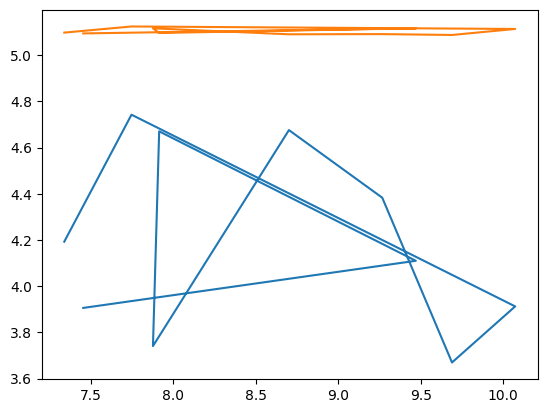

In [105]:
# Gráfica la predicción normalizada
plt.plot(dfPrediccion["inputTest"], dfPrediccion["outputTest"])

# Y el test normalizado
plt.plot(inputTest, outputTest)

## Images

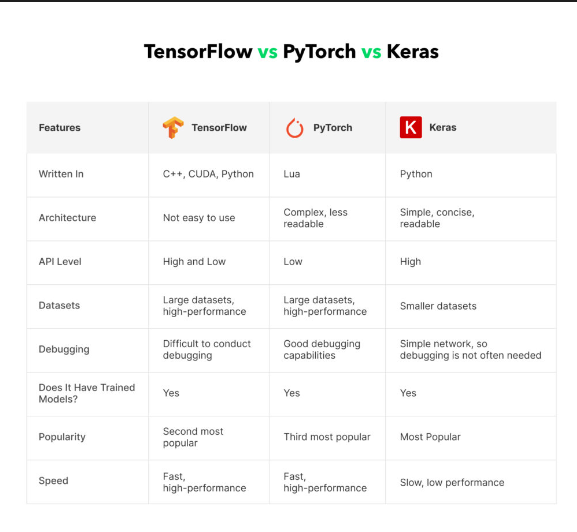

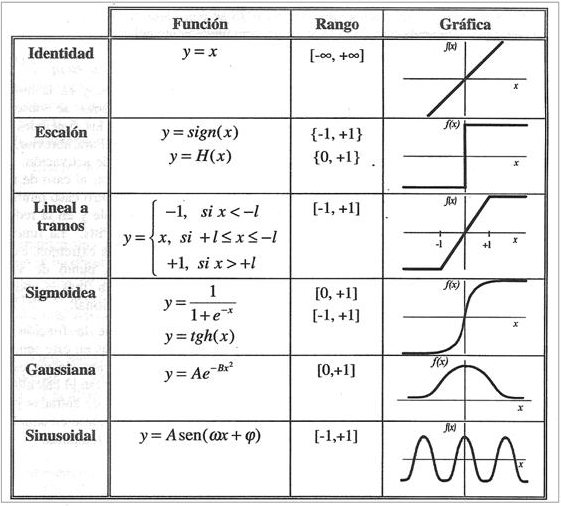